In [33]:
import os
import json
import csv
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, f_oneway,levene
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Chemin vers le dossier contenant les fichiers JSON
dossier_json = "/Users/mohameddiallo/ProjetEmmanuelleClaeys/Academic_Dataset_by_Generated_Photos/generated.photos_metadata"

# Initialiser une liste pour stocker les données
donnees = []

# Parcourir chaque fichier JSON dans le dossier
for nom_json in os.listdir(dossier_json):
    chemin_json = os.path.join(dossier_json, nom_json)

    # Vérifier que le fichier est un fichier JSON
    if nom_json.lower().endswith('.json'):
        # Charger les données JSON depuis le fichier
        with open(chemin_json, 'r') as json_file:
            data = json.load(json_file)

            # Extraire les informations nécessaires
            nom_image = data["image"]
            hair_color = max(data["faceAttributes"]["hair"]["hairColor"], key=lambda x: x["confidence"])["name"]
            hair_length = max(data["faceAttributes"]["hair"]["hairLength"], key=lambda x: x["confidence"])["name"]
            ethnicity = max(data["faceAttributes"]["ethnicity"], key=lambda x: x["confidence"])["name"]
            eye_color = max(data["faceAttributes"]["eye_color"], key=lambda x: x["confidence"])["name"]
            gender = 'male' if data['faceAttributes']['gender']['male'] > data['faceAttributes']['gender']['female'] else 'female' # max(data["faceAttributes"]["gender"].items(), key=lambda x: x[1])[0]  
            age = data["faceAttributes"]["age"]

            # Ajouter les données au dictionnaire
            donnees_image = {
                'Nom de l\'image': nom_image,
                'Hair_Color': hair_color,
                'Hair_Length': hair_length,
                'Ethnicity': ethnicity,
                'Eye_Color': eye_color,
                'Gender': gender,
                'Age': age
            }

            # Ajouter les données de l'image à la liste
            donnees.append(donnees_image)

# Créer un fichier CSV à partir de la liste de données
nom_fichier_csv = 'donnees_from_json.csv'
with open(nom_fichier_csv, 'w', newline='') as csvfile:
    # Définir les noms de colonnes
    colonnes = ['Nom de l\'image', 'Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_Color', 'Gender', 'Age']

    # Créer le writer CSV
    writer = csv.DictWriter(csvfile, fieldnames=colonnes)

    # Écrire les noms de colonnes dans le fichier CSV
    writer.writeheader()

    # Écrire les données dans le fichier CSV
    writer.writerows(donnees)

print(f"Le fichier CSV '{nom_fichier_csv}' a été créé avec succès.")


Le fichier CSV 'donnees_from_json.csv' a été créé avec succès.


In [2]:
df = pd.read_csv('/Users/mohameddiallo/Cours_de_deepLearning/ProjetEmmanuelleClaeys/data/donnees_from_json.csv')

In [4]:
df.head()

,Nom de l'image,Hair_Color,Hair_Length,Ethnicity,Eye_Color,Gender,Age
0,generated.photos_v3_0179531.jpg,brown,Short,white,Brown,male,12.48
1,generated.photos_v3_0480418.jpg,brown,Medium,asian,Brown,female,27.39
2,generated.photos_v3_0291300.jpg,brown,Long,latino,Brown,female,24.91
3,generated.photos_v3_0539541.jpg,black,Short,latino,Brown,male,36.23
4,generated.photos_v3_0476262.jpg,brown,Short,latino,Brown,female,34.92


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nom de l'image  10000 non-null  object 
 1   Hair_Color      10000 non-null  object 
 2   Hair_Length     10000 non-null  object 
 3   Ethnicity       10000 non-null  object 
 4   Eye_Color       10000 non-null  object 
 5   Gender          10000 non-null  object 
 6   Age             10000 non-null  float64
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [6]:
df.describe()

,Age
count,10000.000000
mean,28.919449
std,7.629584
min,1.000000
25%,25.340000
50%,28.800000
75%,32.480000
max,67.780000


In [3]:
def effectif_variables(colonne):
    return df[colonne].value_counts().sort_index()

In [4]:
df1 = df.drop(["Nom de l'image","Age"],axis=1)
interact(effectif_variables, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

In [5]:
def proportion(colonne):
    total = len(df)
    proportion = effectif_variables(colonne) / total
    return proportion

In [6]:
df1 = df.drop(["Nom de l'image","Age"],axis=1)
interact(proportion, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

In [7]:
def description_colonne(colonne):
    return df[colonne].describe()

In [8]:
df1 = df.drop(["Nom de l'image"],axis=1)
interact(description_colonne, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

In [9]:
def min_max_age_list(liste):
    return (min(liste), max(liste))

def list_age_par_colonne(colonne):
    return df.groupby(colonne)['Age'].apply(list).apply(min_max_age_list)


In [10]:
df1 = df.drop(["Nom de l'image","Age"],axis=1)
interact(list_age_par_colonne, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

In [11]:
def count_plot(colonne):
    plt.figure(figsize=(12,4))
    subgrade_order = sorted(df[colonne].unique())
    sns.countplot(x=colonne,data=df,order = subgrade_order,palette='coolwarm' ,hue='Gender')

In [12]:
df1 = df.drop(["Nom de l'image","Age"],axis=1)
interact(count_plot, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

In [13]:
def bar_plot(colonne):
    plt.figure(figsize=(12,4))
    
    df[colonne].value_counts().plot(kind='bar') # normalize=True
    plt.ylabel('Proportion')
    plt.xlabel(f'Distribution of {colonne}')
    plt.show()

In [14]:
df1 = df.drop(["Nom de l'image","Age"],axis=1)
interact(bar_plot, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

In [15]:
def hist_plot(colonne):
    plt.figure(figsize=(12,4))
    sns.histplot(data = df[colonne])
    plt.ylabel('Proportion')
    plt.xlabel(f'Distribution of {colonne}')
    plt.show()

In [16]:
df1 = df.drop(["Nom de l'image"],axis=1)
interact(hist_plot, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

In [17]:
def box_plot(colonne):
    plt.figure(figsize=(12,4))
    sns.boxplot(data = df[colonne])
    plt.ylabel('Proportion')
    plt.xlabel(f'Distribution of {colonne}')
    plt.show()

In [18]:
df1 = df.drop(["Nom de l'image"],axis=1)
interact(box_plot, colonne=df1);

interactive(children=(Dropdown(description='colonne', options=('Hair_Color', 'Hair_Length', 'Ethnicity', 'Eye_…

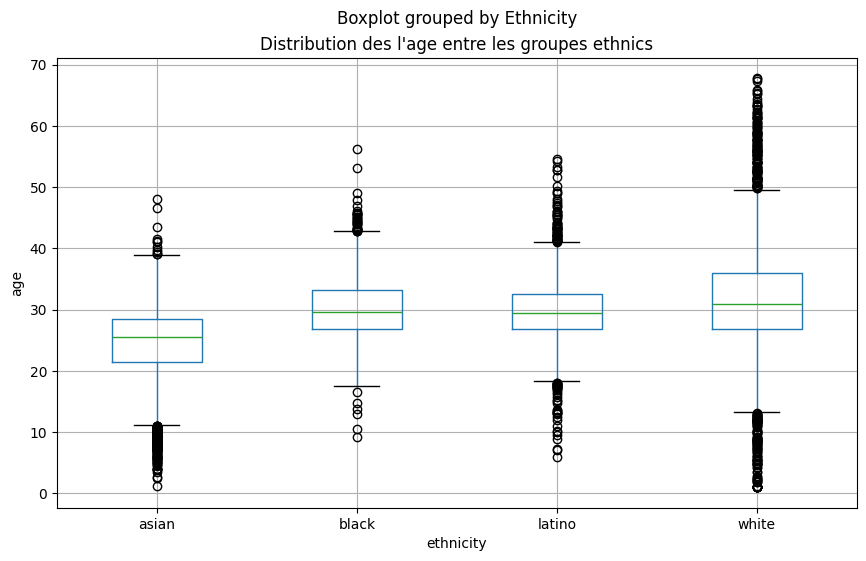

In [19]:
# Distribution des ages entre les groupe ethnics
# Pour ce faire on va créer un diagramme en boîte pour chaque groupe 

df.boxplot(column = 'Age', by = 'Ethnicity', figsize=(10, 6))

#ajout de details sur legraphique
plt.title('Distribution des l\'age entre les groupes ethnics')
plt.xlabel('ethnicity')
plt.ylabel('age')
plt.show()

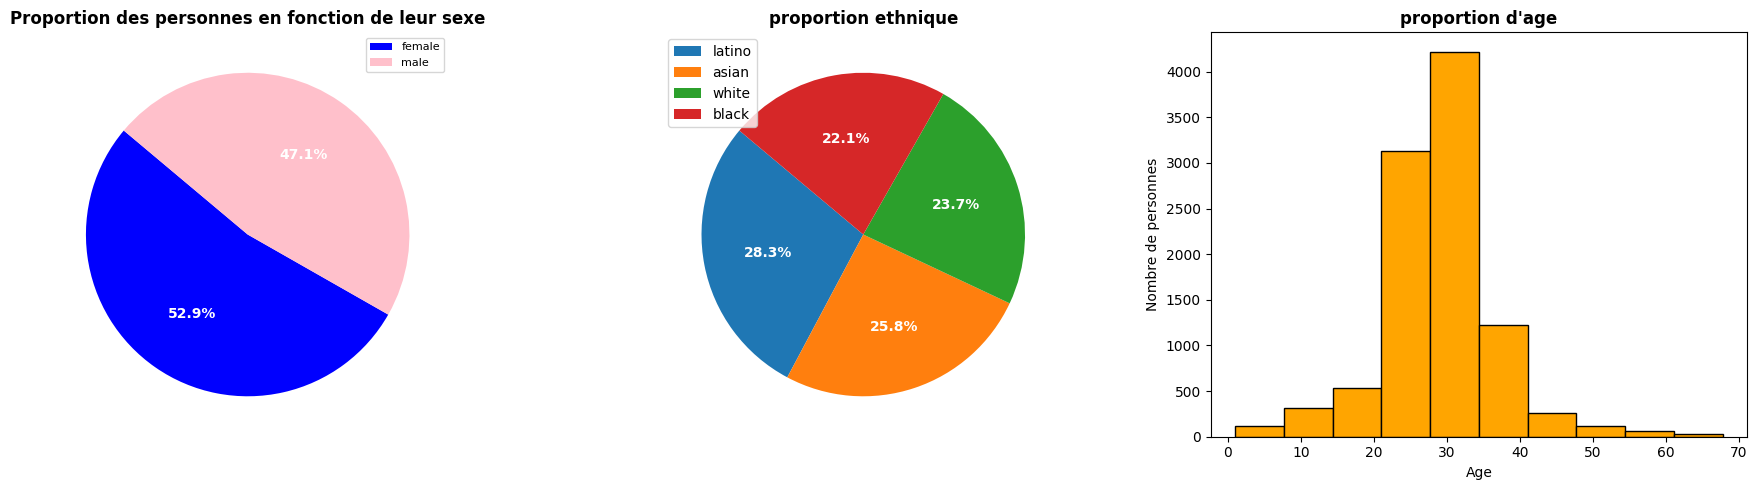

In [20]:
# Etude de proportion par rapport au sexe
sexe_counts = df['Gender'].value_counts()
ethinic_counts = df['Ethnicity'].value_counts()

fig,(ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3,figsize=(18, 5))
ax0.pie(sexe_counts, labels=sexe_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'],
       textprops={'color': 'white', 'weight': 'bold'})
ax0.set_title('Proportion des personnes en fonction de leur sexe', fontweight='bold')
ax0.legend(prop={'size':8})

# Etude de proportion par rapport aux ethnies
ax1.pie(ethinic_counts, labels= ethinic_counts.index, autopct='%1.1f%%', startangle=140,
       textprops={'color': 'white', 'weight': 'bold'})
ax1.set_title('proportion ethnique', fontweight='bold')
ax1.legend(prop={'size':10})

#Etude de proportion d'age 
ax2.hist(df['Age'], bins = 10, color = 'orange', edgecolor = 'black',)
ax2.set_title("proportion d'age", fontweight='bold')
ax2.set_xlabel('Age')
ax2.set_ylabel('Nombre de personnes')


fig.tight_layout()
plt.show()

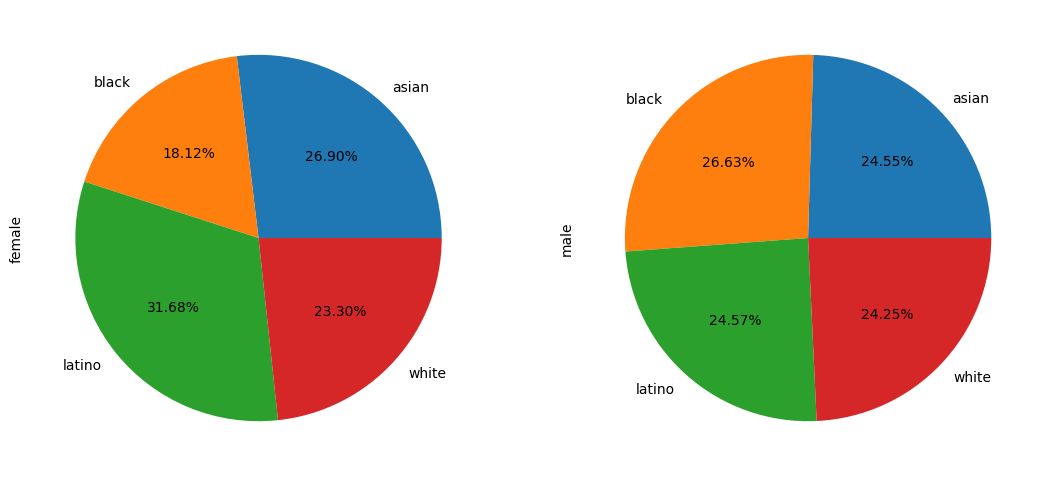

In [21]:
gender_counts = df.groupby('Ethnicity')['Gender'].value_counts().unstack()
gender_counts.plot(kind='pie', subplots=True, figsize=(13, 8), autopct='%2.2f%%',legend=False)
plt.show()

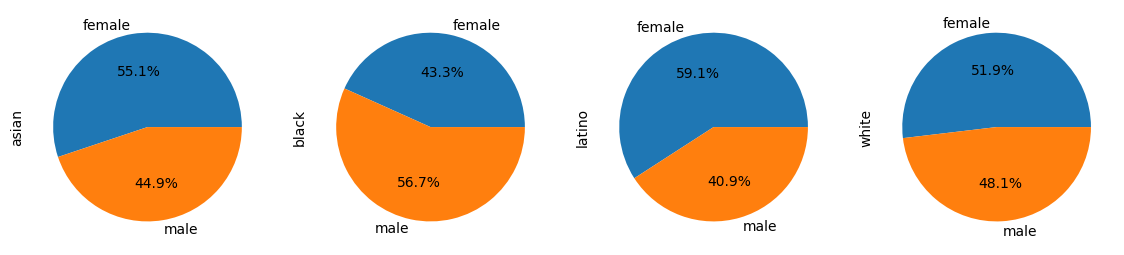

In [22]:
gender_counts = df.groupby('Gender')['Ethnicity'].value_counts().unstack()
gender_counts.plot(kind='pie', subplots=True, figsize=(14, 9), autopct='%1.1f%%',legend=False)
plt.show()

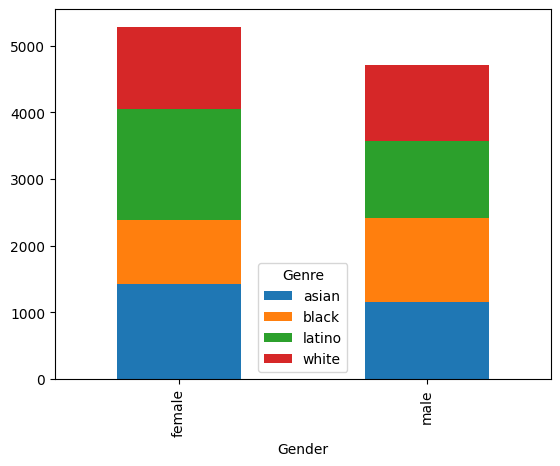

In [23]:
cross_tab = pd.crosstab(df['Gender'], df['Ethnicity'])
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
plt.legend(title='Genre')
plt.show()

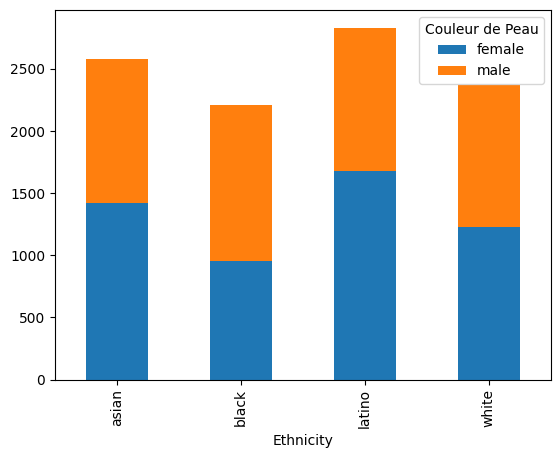

In [24]:
cross_tab = pd.crosstab(df['Ethnicity'], df['Gender'])
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
plt.legend(title='Couleur de Peau')
plt.show()


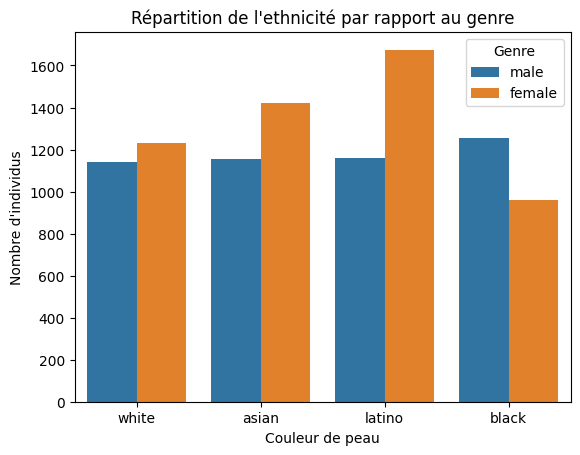

In [28]:
# Répartition de l'ethnicité par rapport au genre

sns.countplot(x='Ethnicity', hue='Gender', data=df)
plt.xlabel('Couleur de peau')
plt.ylabel('Nombre d\'individus')
plt.title("Répartition de l'ethnicité par rapport au genre")
plt.legend(title='Genre')
plt.show()


## Analyse de la distribution du genre par rapport à l'etnicité

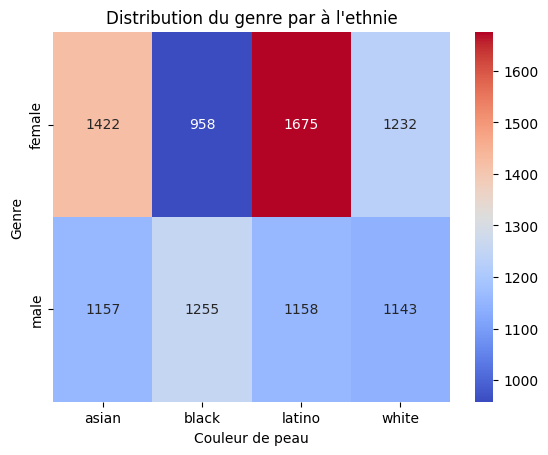

In [30]:
# Créer un tableau croisé du genre par couleur de peau
cross_tab = pd.crosstab(df['Gender'], df['Ethnicity'])

# Visualiser la distribution du genre par couleur de peau
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title("Distribution du genre par à l'ethnie")
plt.xlabel('Couleur de peau')
plt.ylabel('Genre')
plt.show()

## Test d'independance entre l'etnie et le genre

In [34]:
def chi2_test(column1, column2):
    contingency_table = pd.crosstab(df[column1], df[column2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Test du Chi-deux pour {column1} et {column2}:")
    print(f"Chi2 : {chi2}, p-value : {p}")

chi2_test('Gender', 'Ethnicity')

Test du Chi-deux pour Gender et Ethnicity:
Chi2 : 132.26073231679817, p-value : 1.7613659003649176e-28


## Calcul du coefficient de V de Cramer

In [36]:
def cramers_v(chi2, n, r, c):
    """Calcul du coefficient de V de Cramer."""
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

def calculate_cramers_v(chi2, contingency_table):
    """Calcul du coefficient de V de Cramer à partir du Chi2 et du tableau de contingence."""
    n = contingency_table.values.sum()  # Taille de l'échantillon
    r, c = contingency_table.shape  # Nombre de niveaux pour chaque variable
    
    # Calcul du coefficient de V de Cramer
    v_cramer = cramers_v(chi2, n, r, c)
    return v_cramer


chi2_value = 132.26073231679817
contingency_table = pd.crosstab(df['Gender'], df['Ethnicity']) 
v_cramer = calculate_cramers_v(chi2_value, contingency_table)

print(f"Coef. de V de Cramer : {v_cramer}")


Coef. de V de Cramer : 0.11500466613003064


## Test de normalité

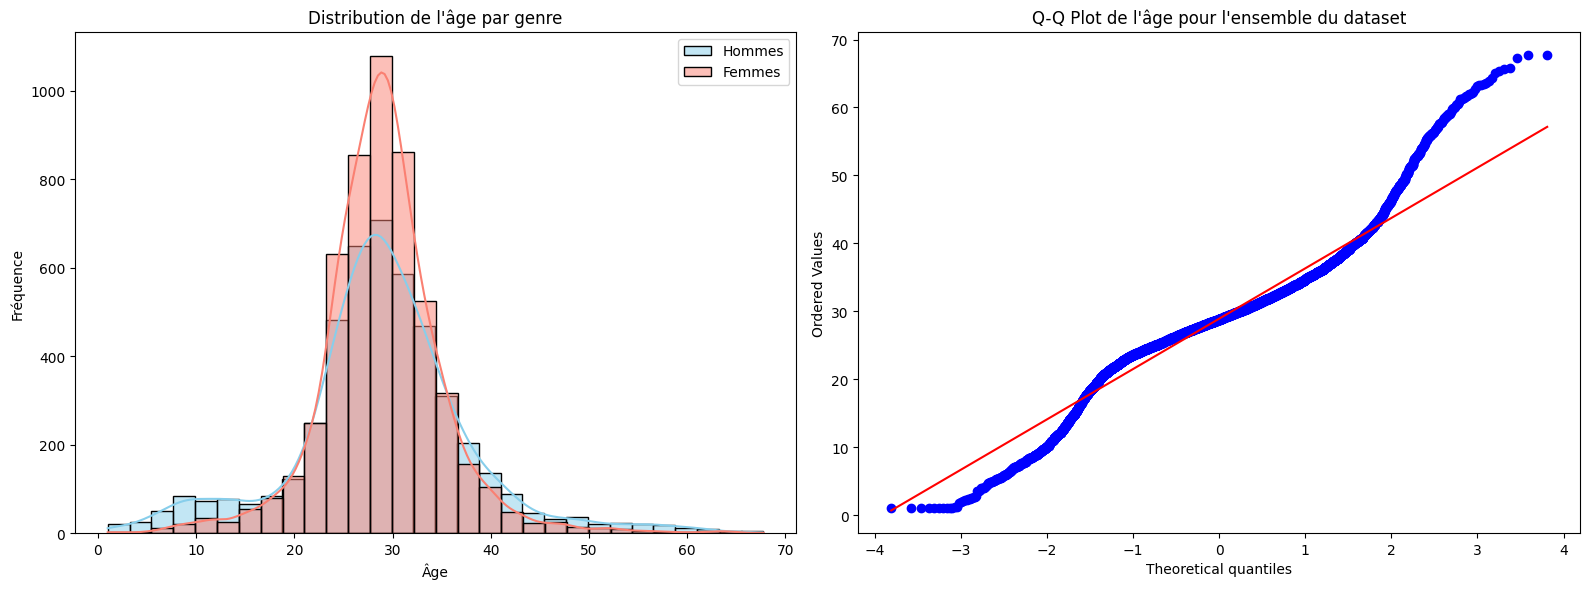

In [82]:
from scipy.stats import probplot

# Séparer les groupes par genre
group1 = df['Age'][df['Gender'] == 'male']
group2 = df['Age'][df['Gender'] == 'female']

# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogramme de l'âge pour chaque groupe
sns.histplot(group1, kde=True, bins=30, color='skyblue', ax=axes[0], label='Hommes')
sns.histplot(group2, kde=True, bins=30, color='salmon', ax=axes[0], label='Femmes')
axes[0].set_title('Distribution de l\'âge par genre')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Fréquence')
axes[0].legend()

# Q-Q Plot (Quantile-Quantile) pour l'ensemble du dataset
probplot(df['Age'], plot=axes[1], fit=True)
axes[1].set_title('Q-Q Plot de l\'âge pour l\'ensemble du dataset')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


Mesure de la normalité de l'age dans le dataset afin d'utiliser ou non les test paramétriques comme "t student"

Tester la normalité entre l'age et le genre

In [84]:
from scipy.stats import shapiro

# Fonction pour effectuer le test de normalité et interpréter les résultats
def test_normality_by_group(data, group_column, group_values, alpha=0.05):
    for group_value in group_values:
        # Sélectionner les données du groupe
        group_data = data[data[group_column] == group_value]['Age']

        # Effectuer le test de normalité avec le test de Shapiro-Wilk
        stat, p_value = shapiro(group_data)

        print(f"\nRésultats du test de normalité (Shapiro-Wilk) pour le groupe {group_value} :")
        print(f"Statistique de test : {stat}")
        print(f"P-valeur : {p_value}")

        # Interprétation du test de normalité
        if p_value < alpha:
            print("Rejet de l'hypothèse nulle. La distribution n'est pas normale.")
        else:
            print("Pas suffisamment de preuves pour rejeter l'hypothèse nulle. La distribution est normale.")

# Appliquer le test de normalité sur l'âge en fonction du genre
group_column = 'Gender'
group_values = ['male', 'female']
test_normality_by_group(df, group_column, group_values)



Résultats du test de normalité (Shapiro-Wilk) pour le groupe male :
Statistique de test : 0.9561044573783875
P-valeur : 1.7356967605975065e-35
Rejet de l'hypothèse nulle. La distribution n'est pas normale.

Résultats du test de normalité (Shapiro-Wilk) pour le groupe female :
Statistique de test : 0.9450897574424744
P-valeur : 1.5325580914781227e-40
Rejet de l'hypothèse nulle. La distribution n'est pas normale.


/Users/mohameddiallo/ml/envPy39/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [42]:
from scipy.stats import anderson

# Fonction pour effectuer le test d'Anderson-Darling par groupe et interpréter les résultats
def test_anderson_by_group(data, group_col):
    groups = data.groupby(group_col)
    
    for group_name, group_data in groups:
        result_anderson = anderson(group_data['Age'])
        
        print(f"\nRésultats du test d'Anderson-Darling pour le groupe '{group_name}' :")
        print(f"Statistique de test : {result_anderson.statistic}")
        print("Liste des valeurs critiques :")
        for i, crit_val in enumerate(result_anderson.critical_values):
            print(f"   Niveau de signification {result_anderson.significance_level[i]}% : {crit_val}")

        # Interprétation des résultats
        if result_anderson.statistic > result_anderson.critical_values[2]:
            print("Rejet de l'hypothèse nulle. La distribution des âges n'est pas normale.")
        else:
            print("Pas suffisamment de preuves pour rejeter l'hypothèse nulle. La distribution des âges semble normale.")

# Appliquer le test d'Anderson-Darling sur l'âge en fonction du genre
test_anderson_by_group(df, 'Gender')



Résultats du test d'Anderson-Darling pour le groupe 'female' :
Statistique de test : 61.44870217978678
Liste des valeurs critiques :
   Niveau de signification 15.0% : 0.576
   Niveau de signification 10.0% : 0.656
   Niveau de signification 5.0% : 0.786
   Niveau de signification 2.5% : 0.917
   Niveau de signification 1.0% : 1.091
Rejet de l'hypothèse nulle. La distribution des âges n'est pas normale.

Résultats du test d'Anderson-Darling pour le groupe 'male' :
Statistique de test : 67.985150739667
Liste des valeurs critiques :
   Niveau de signification 15.0% : 0.576
   Niveau de signification 10.0% : 0.655
   Niveau de signification 5.0% : 0.786
   Niveau de signification 2.5% : 0.917
   Niveau de signification 1.0% : 1.091
Rejet de l'hypothèse nulle. La distribution des âges n'est pas normale.


## Test d'égalité des variance

In [66]:
group1 = df['Age'][df['Gender'] == 'male']
group2 = df['Age'][df['Gender'] == 'female']
variance_groupe1 = np.var(groupe1)
variance_groupe2 = np.var(groupe2)
stat, p_value = levene(groupe1, groupe2)

print(f"Statistique de Levene : {stat}")
print(f"Statistique de variance_groupe1 : {variance_groupe1}")
print(f"Statistique de variance_groupe2 : {variance_groupe2}")

print(f"P-value : {p_value}")

Statistique de Levene : 172.46066259518508
Statistique de variance_groupe1 : 45.42725173079731
Statistique de variance_groupe2 : 107.58143644163547
P-value : 9.473853446614127e-39


Vu que la P-value est inferieur à 0.05, alors on rejette l'hypotèse H0 (les données ne sont pas homogènes)

La différence significative dans les variances suggère que la variabilité des âges diffère entre les deux groupes de genre. Cela peut indiquer une hétérogénéité importante dans la répartition des âges entre les genres

## Test de Mann-Whitney

In [37]:
from scipy.stats import mannwhitneyu

# Diviser le dataset en deux groupes 
group1 = df['Age'][df['Gender'] == 'male']
group2 = df['Age'][df['Gender'] == 'female']


# Effectuer le test de Mann-Whitney
stat_mw, p_value_mw = mannwhitneyu(group1, group2)

# Afficher les résultats
print("Résultats du test de Mann-Whitney :")
print(f"Statistique de test : {stat_mw}")
print(f"P-valeur : {p_value_mw}")

# Interprétation des résultats
if p_value_mw < 0.05:
    print("\nRejet de l'hypothèse nulle. Il y a des différences significatives dans la distribution des âges entre les groupes.")
else:
    print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. Il n'y a pas de différence significative dans la distribution des âges entre les groupes.")


Résultats du test de Mann-Whitney :
Statistique de test : 12463276.5
P-valeur : 0.9753072251993854

Pas suffisamment de preuves pour rejeter l'hypothèse nulle. Il n'y a pas de différence significative dans la distribution des âges entre les groupes.


## Test de Kruskal-Wallis pour comparer plusieurs groupes

In [40]:
from scipy.stats import kruskal

# Définir les hypothèses
h0 = "Il n'y a pas de différence significative dans la distribution des âges entre les groupes etnique."
h1 = "Il y a une différence significative dans la distribution des âges entre les groupes etnique."

hair_color_groups = df.groupby('Ethnicity')['Age'].apply(list)
stat_kw, p_value_kw = kruskal(*hair_color_groups)

# Affichage des résultats du test de Kruskal-Wallis
print("\nRésultats du test de Kruskal-Wallis pour la comparaison des âges entre les groupes etnique:")
print(f"Statistique de test (H) : {stat_kw}")
print(f"P-valeur : {p_value_kw}")

# Interprétation des résultats du test de Kruskal-Wallis
if p_value_kw < 0.05:
    print("\nRejet de l'hypothèse nulle. Il y a une différence significative dans la distribution des âges entre les groupes etnique.")
else:
    print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. Il n'y a pas de différence significative dans la distribution des âges entre les groupes etnique.")



Résultats du test de Kruskal-Wallis pour la comparaison des âges entre les groupes etnique:
Statistique de test (H) : 1512.0281226963357
P-valeur : 0.0

Rejet de l'hypothèse nulle. Il y a une différence significative dans la distribution des âges entre les groupes etnique.


## Analyse de la diversité ethnique

In [43]:
from scipy.stats import chi2_contingency



# Définir les hypothèses
h0 = "Il n'y a pas d'association significative entre l'ethnicité et la couleur des cheveux."
h1 = "Il y a une association significative entre l'ethnicité et la couleur des cheveux."

# Créer une table de contingence
contingency_table = pd.crosstab(df['Ethnicity'], df['Hair_Color'])

# Test du chi carré
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print("Résultats du test du chi carré :")
print(f"Statistique de test (chi carré) : {chi2_stat}")
print(f"P-valeur : {p_value}")

# Interprétation des résultats
if p_value < 0.05:
    print("\nRejet de l'hypothèse nulle. " + h1)
else:
    print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. " + h0)


Résultats du test du chi carré :
Statistique de test (chi carré) : 2826.7761156615593
P-valeur : 0.0

Rejet de l'hypothèse nulle. Il y a une association significative entre l'ethnicité et la couleur des cheveux.


## Evaluer la force de l’association entre les deux classes grace au V de Cramer

In [43]:
def cramers_v(chi2, n, r, c):
    """Calcul du coefficient de V de Cramer."""
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

def calculate_cramers_v(chi2, contingency_table):
    """Calcul du coefficient de V de Cramer à partir du Chi2 et du tableau de contingence."""
    n = contingency_table.values.sum()  # Taille de l'échantillon
    r, c = contingency_table.shape  # Nombre de niveaux pour chaque variable
    
    # Calcul du coefficient de V de Cramer
    v_cramer = cramers_v(chi2, n, r, c)
    return v_cramer


chi2_value = 2826.77611
contingency_table = pd.crosstab(df['Ethnicity'], df['Hair_Color']) 
v_cramer = calculate_cramers_v(chi2_value, contingency_table)

print(f"Coef. de V de Cramer : {v_cramer}")


Coef. de V de Cramer : 0.30696232722165323


## Calcule des indices de diversité ethnique pour évaluer la représentation relative des groupes ethniques dans le dataset.

In [44]:
from scipy.stats import entropy

# Définir les hypothèses
h0 = "Il n'y a pas de diversité significative dans la distribution ethnique."
h1 = "Il y a une diversité significative dans la distribution ethnique."

# Calculer la distribution des groupes ethniques
ethnicity_distribution = df['Ethnicity'].value_counts(normalize=True)

# Calculer l'indice de Shannon
shannon_index = -sum(p * np.log(p) for p in ethnicity_distribution)

# Affichage des résultats
print("Résultats de l'indice de Shannon pour la diversité ethnique :")
print(f"Indice de Shannon : {shannon_index}")

# Interprétation des résultats
if shannon_index > 0:
    print("\nRejet de l'hypothèse nulle. " + h1)
else:
    print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. " + h0)


Résultats de l'indice de Shannon pour la diversité ethnique :
Indice de Shannon : 1.3820132976427753

Rejet de l'hypothèse nulle. Il y a une diversité significative dans la distribution ethnique.


## Corrélations entre variables

In [85]:
from scipy.stats import chi2_contingency
from collections import Counter



# Définir les hypothèses pour les tests du chi carré
h0 = "Il n'y a pas d'association significative entre l'ethnicité et la couleur de cheveux."
h1 = "Il y a une association significative entre l'ethnicité et la couleur de cheveux."

# Variables à analyser
variables_to_analyze = ['Hair_Color', 'Hair_Length'] 

# Fonction pour effectuer le test du chi carré et afficher les résultats
def chi_square_test(variable):
    contingency_table = pd.crosstab(df['Ethnicity'], df[variable])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Résultats du test du chi carré pour {variable}:")
    print(f"Statistique de test (chi carré) : {chi2_stat}")
    print(f"P-valeur : {p_value}")

    # Interprétation des résultats
    if p_value < 0.05:
        print("\nRejet de l'hypothèse nulle. " + h1,'\n')
    else:
        print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. " + h0)

# Effectuer le test du chi carré pour chaque variable spécifiée
for variable in variables_to_analyze:
    chi_square_test(variable)

# Calculer les indices de diversité ethnique
ethnicity_counts = Counter(df['Ethnicity'])
total_samples = len(df)

diversity_indices = {ethnicity: count / total_samples for ethnicity, count in ethnicity_counts.items()}

# Afficher les indices de diversité ethnique
print("\nIndices de diversité ethnique :")
for ethnicity, index in diversity_indices.items():
    print(f"{ethnicity}: {index}")


Résultats du test du chi carré pour Hair_Color:
Statistique de test (chi carré) : 2826.7761156615593
P-valeur : 0.0

Rejet de l'hypothèse nulle. Il y a une association significative entre l'ethnicité et la couleur de cheveux. 

Résultats du test du chi carré pour Hair_Length:
Statistique de test (chi carré) : 514.4899277358114
P-valeur : 6.352898738883281e-108

Rejet de l'hypothèse nulle. Il y a une association significative entre l'ethnicité et la couleur de cheveux. 


Indices de diversité ethnique :
white: 0.2375
asian: 0.2579
latino: 0.2833
black: 0.2213


In [46]:
# Définir les hypothèses
h0 = "Il n'y a pas d'association significative entre les variables Ethnicity et Hair_Color."
h1 = "Il y a une association significative entre les variables Ethnicity et Hair_Color."

# Créer une table de contingence entre les variables catégorielles 
contingency_table = pd.crosstab(df['Ethnicity'], df['Hair_Color'])

# Calcul du coefficient de contingence
c, _, _, _ = chi2_contingency(contingency_table)

# Affichage des résultats
print("Résultats du test du coefficient de contingence :")
print(f"Coefficient de contingence : {c}")

# Interprétation des résultats
if c > 0:
    print("\nRejet de l'hypothèse nulle. " + h1)
else:
    print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. " + h0)


Résultats du test du coefficient de contingence :
Coefficient de contingence : 2826.7761156615593

Rejet de l'hypothèse nulle. Il y a une association significative entre les variables Ethnicity et Hair_Color.


## Tests de distribution des caractéristiques physiques 

Tests de chi carré pour vérifier l'association entre la couleur des cheveux et la couleur des yeux.

In [45]:
# Définir les hypothèses
h0 = "Il n'y a pas d'association significative entre la couleur des cheveux et la couleur des yeux."
h1 = "Il y a une association significative entre la couleur des cheveux et la couleur des yeux."

# Créer une table de contingence
contingency_table = pd.crosstab(df['Hair_Color'], df['Eye_Color'])

# Test du chi carré
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print("Résultats du test du chi carré :")
print(f"Statistique de test (chi carré) : {chi2_stat}")
print(f"P-valeur : {p_value}")

# Interprétation des résultats
if p_value < 0.05:
    print("\nRejet de l'hypothèse nulle. " + h1)
else:
    print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. " + h0)


Résultats du test du chi carré :
Statistique de test (chi carré) : 2491.6511417198944
P-valeur : 0.0

Rejet de l'hypothèse nulle. Il y a une association significative entre la couleur des cheveux et la couleur des yeux.


## Coefficient de corrélation de Spearman

In [51]:
from scipy.stats import spearmanr

correlation, p_value_corr = spearmanr(df['Ethnicity'], df['Eye_Color'])

# Afficher les résultats
print("Résultats du coefficient de corrélation de Spearman :")
print(f"Coefficient de corrélation : {correlation}")
print(f"P-valeur : {p_value_corr}")

# Interprétation des résultats
if p_value_corr < 0.05:
    print("\nRejet de l'hypothèse nulle. Il y a une corrélation significative entre les variables Ethnicity et .")
else:
    print("\nPas suffisamment de preuves pour rejeter l'hypothèse nulle. Il n'y a pas de corrélation significative entre les variables.")


Résultats du coefficient de corrélation de Spearman :
Coefficient de corrélation : 0.09128125095517912
P-valeur : 5.903556278589221e-20

Rejet de l'hypothèse nulle. Il y a une corrélation significative entre les variables.
